In [1]:
from exact_diag import form_basis, periodic_ham, antiperiodic_ham
from solve_rg_eqs import bootstrap_g0, solve_Gs_list
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
l = 4
k_peri = np.pi*np.arange(-2*l, 2*l, 2)/(2*l)
k_anti = np.pi*np.arange(-2*l+1, 2*l, 2)/(2*l)
k_pos = k_anti[l:]
print(k_peri)
print(k_anti)
print(k_pos)
Gc = 1./np.sum(np.sin(.5*k_pos))
print(Gc)
print(2*l/np.sum(k_pos))
print(2*l/(2*np.pi))

[-3.14159265 -2.35619449 -1.57079633 -0.78539816  0.          0.78539816
  1.57079633  2.35619449]
[-2.74889357 -1.96349541 -1.17809725 -0.39269908  0.39269908  1.17809725
  1.96349541  2.74889357]
[0.39269908 1.17809725 1.96349541 2.74889357]
0.39018064403225655
1.2732395447351628
1.2732395447351628


# $\rho = 0.5$ (quarter filling)

In [3]:
Nup = l//2
print('Nup')
print(Nup)
# Ndown = 6
basis = form_basis(2*l, Nup, Nup)
basis_plus = form_basis(2*l, Nup+1, Nup+1)
basis_minus = form_basis(2*l, Nup-1, Nup-1)
bases = [basis, basis_plus, basis_minus]
Gr = .5
Ghr = 1.5
print('Gs')
print(Gr)
print(Ghr)
# Ghr = 2
Gs = [Gr*Gc, Ghr*Gc]
es_peri = np.zeros((2, 3))
es_anti = np.zeros((2, 3))
Grs = []
for i, G in enumerate(Gs):
    Gr = np.round(G/Gc, 1)
    Grs += [Gr]
    for j, b in enumerate(bases):
        print('How many states?')
        print(b.Ns)
        h_peri = periodic_ham(l, G, b)
        h_anti = antiperiodic_ham(l, G, b)
        if b.Ns > 1000:
            ep, _ = h_peri.eigsh(k=10, which='SA')
            ea, _ = h_anti.eigsh(k=10, which='SA')
        else:
            ep, _ = h_peri.eigh()
            ea, _ = h_anti.eigh()
        es_peri[i,j] = min(ep)
        es_anti[i,j] = min(ea)

Nup
2
Gs
0.5
1.5
How many states?
784
How many states?
3136
How many states?
64
How many states?
784
How many states?
3136
How many states?
64


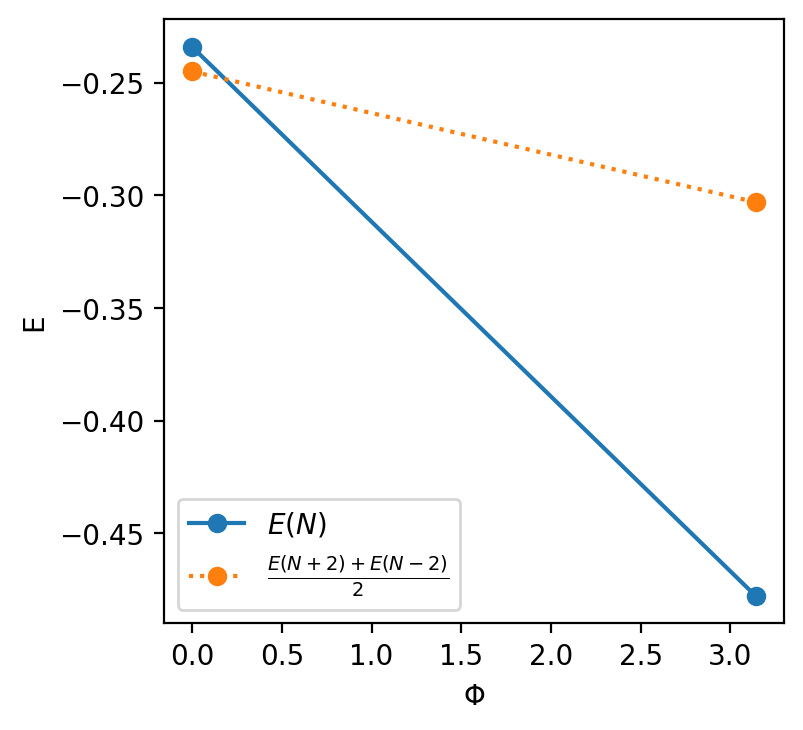

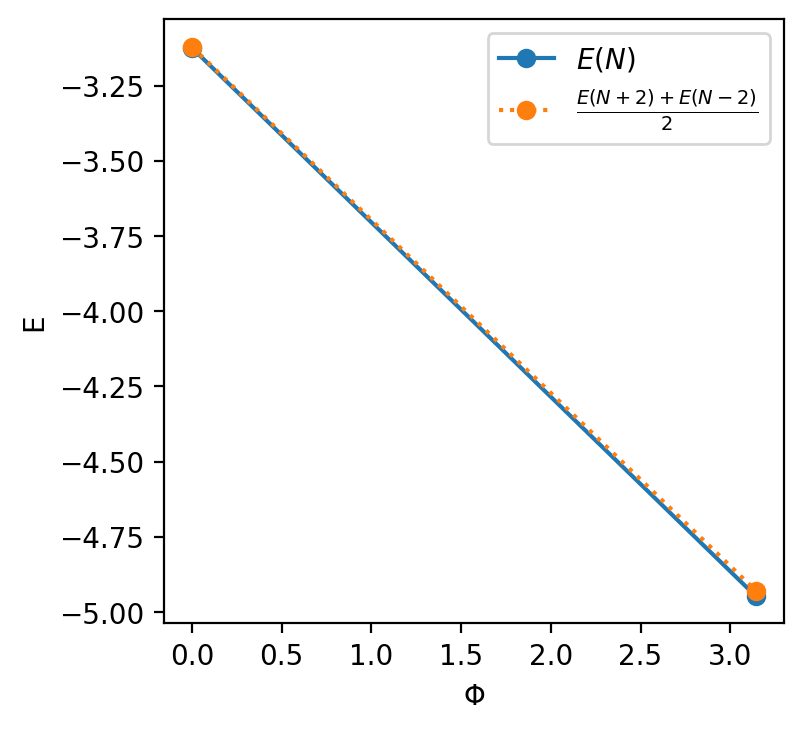

In [4]:
es_even_b = [es_peri[0,0], es_anti[0,0]]
es_odd_b = [0.5*(es_peri[0,1] + es_peri[0,2]), 0.5*(es_anti[0,1] + es_anti[0,2])]
es_even_a = [es_peri[1,0], es_anti[1,0]]
es_odd_a = [0.5*(es_peri[1,1] + es_peri[1,2]), 0.5*(es_anti[1,1] + es_anti[1,2])]
plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_b), label=r'$E(N)$', marker='o')
plt.plot([0, np.pi], es_odd_b, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_topo.png')
plt.show()

plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_a), label=r'$E(N)$', marker='o')
plt.plot([0, np.pi], es_odd_a, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_triv.png')
plt.show()

# $\rho = 1$ (half-filling)

In [5]:
Nup = 2*(l//2)
# Ndown = 6
basis = form_basis(2*l, Nup, Nup)
basis_plus = form_basis(2*l, Nup+1, Nup+1)
basis_minus = form_basis(2*l, Nup-1, Nup-1)
bases = [basis, basis_plus, basis_minus]
Gr = .5
Ghr = 1.5
# Ghr = 2
Gs = [Gr*Gc, Ghr*Gc]
print('G/Gc')
print(Gr)
print(Ghr)
es_peri = np.zeros((2, 3))
es_anti = np.zeros((2, 3))
Grs = []
for i, G in enumerate(Gs):
    Gr = np.round(G/Gc, 1)
    Grs += [Gr]
    for j, b in enumerate(bases):
        print('How many states?')
        print(b.Ns)
        h_peri = periodic_ham(l, G, b)
        h_anti = antiperiodic_ham(l, G, b)
        if b.Ns > 1000:
            ep, _ = h_peri.eigsh(k=10, which='SA')
            ea, _ = h_anti.eigsh(k=10, which='SA')
        else:
            ep, _ = h_peri.eigh()
            ea, _ = h_anti.eigh()
        es_peri[i,j] = min(ep)
        es_anti[i,j] = min(ea)

G/Gc
0.5
1.5
How many states?
4900
How many states?
3136
How many states?
3136
How many states?
4900
How many states?
3136
How many states?
3136


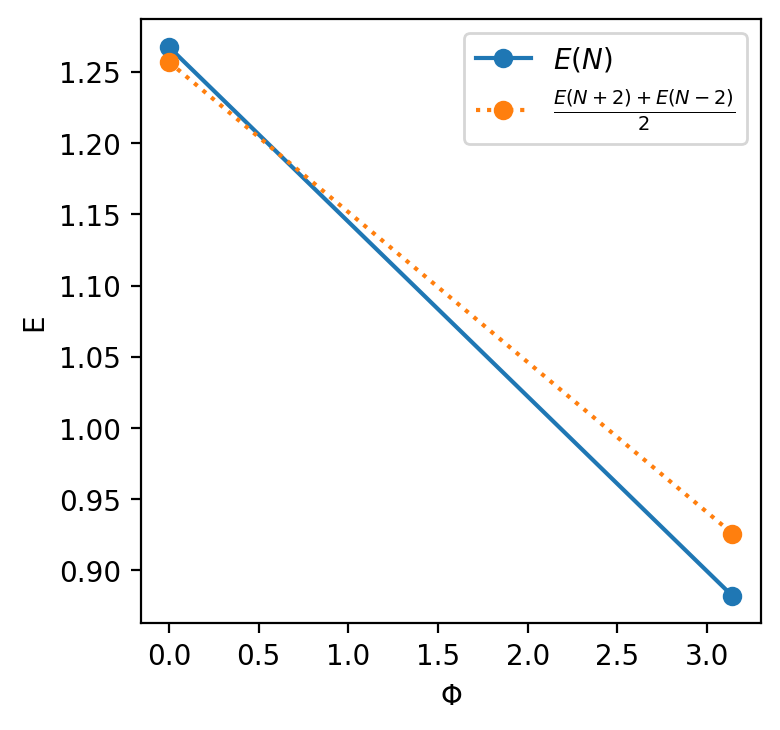

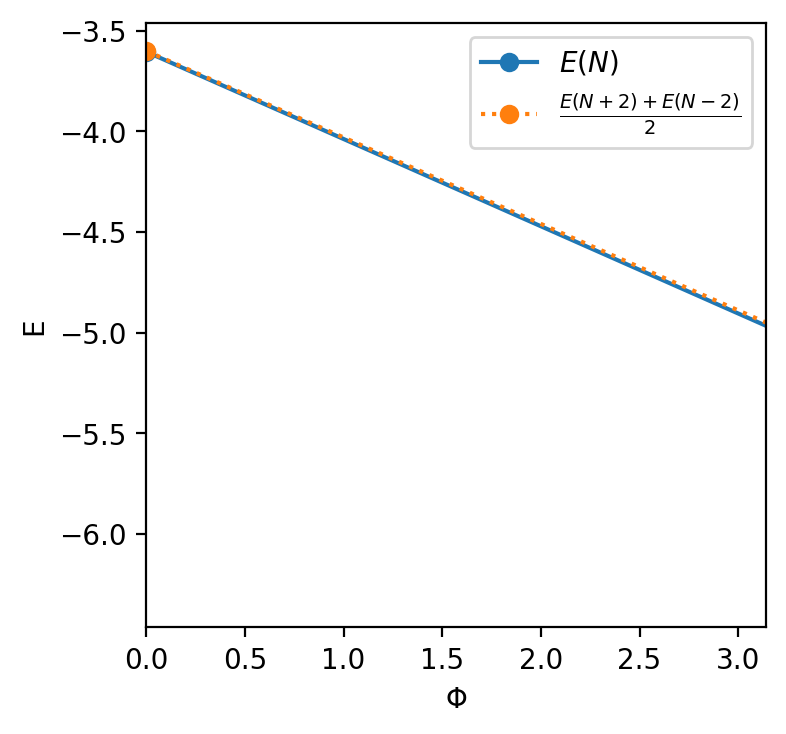

In [6]:
es_even_b = [es_peri[0,0], es_anti[0,0]]
es_odd_b = [0.5*(es_peri[0,1] + es_peri[0,2]), 0.5*(es_anti[0,1] + es_anti[0,2])]
es_even_a = [es_peri[1,0], es_anti[1,0]]
es_odd_a = [0.5*(es_peri[1,1] + es_peri[1,2]), 0.5*(es_anti[1,1] + es_anti[1,2])]
plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_b), label=r'$E(N)$', marker='o')
plt.plot([0, np.pi], es_odd_b, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_topo.png')
plt.show()

plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, 2*np.pi], np.array(es_even_a), label=r'$E(N)$', marker='o')
plt.plot([0, 2*np.pi], es_odd_a, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.xlim(0, np.pi)
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_triv.png')
plt.show()

# $\rho = 1.5$ (3/4 filling)

In [7]:
Nup = 3*(l//2)
# Ndown = 6
basis = form_basis(2*l, Nup, Nup)
basis_plus = form_basis(2*l, Nup+1, Nup+1)
basis_minus = form_basis(2*l, Nup-1, Nup-1)
bases = [basis, basis_plus, basis_minus]
Gr = .5
Ghr = 1.5
# Ghr = 2
Gs = [Gr*Gc, Ghr*Gc]
print('G/Gc')
print(Gr)
print(Ghr)
es_peri = np.zeros((2, 3))
es_anti = np.zeros((2, 3))
Grs = []
for i, G in enumerate(Gs):
    Gr = np.round(G/Gc, 1)
    Grs += [Gr]
    for j, b in enumerate(bases):
        print('How many states?')
        print(b.Ns)
        h_peri = periodic_ham(l, G, b)
        h_anti = antiperiodic_ham(l, G, b)
        if b.Ns > 1000:
            ep, _ = h_peri.eigsh(k=10, which='SA')
            ea, _ = h_anti.eigsh(k=10, which='SA')
        else:
            ep, _ = h_peri.eigh()
            ea, _ = h_anti.eigh()
        es_peri[i,j] = min(ep)
        es_anti[i,j] = min(ea)

G/Gc
0.5
1.5
How many states?
784
How many states?
64
How many states?
3136
How many states?
784
How many states?
64
How many states?
3136


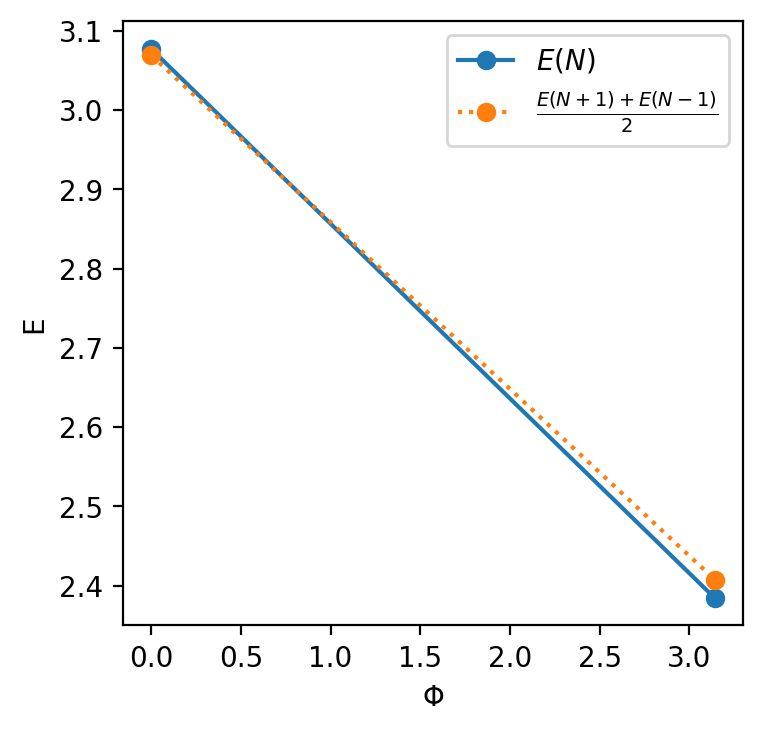

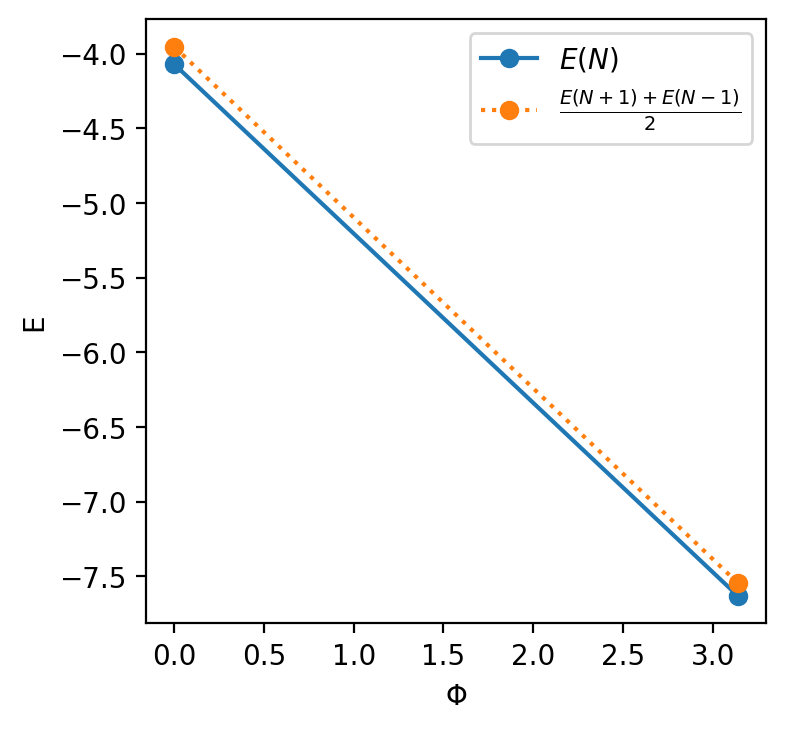

In [8]:
es_even_b = [es_peri[0,0], es_anti[0,0]]
es_odd_b = [0.5*(es_peri[0,1] + es_peri[0,2]), 0.5*(es_anti[0,1] + es_anti[0,2])]
es_even_a = [es_peri[1,0], es_anti[1,0]]
es_odd_a = [0.5*(es_peri[1,1] + es_peri[1,2]), 0.5*(es_anti[1,1] + es_anti[1,2])]
plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_b), label=r'$E(N)$', marker='o')
plt.plot([0, np.pi], es_odd_b, label=r'$\frac{E(N+1)+E(N-1)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_topo.png')
plt.show()

plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_a), label=r'$E(N)$', marker='o')
plt.plot([0, np.pi], es_odd_a, label=r'$\frac{E(N+1)+E(N-1)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_triv.png')
plt.show()

# Richardson-Gaudin parity switch

I think the best I can do here for periodic is to use periodic $k$ (other than 0 and $-\pi$).

In [9]:
l = 16
L = 2*l
Nup = l//2
Ndwn = l//2
k_peri = np.pi*np.arange(2, 2*l, 2)/(2*l) # leaving out the k=0 bit
k_anti = np.pi*np.arange(1, 2*l+1, 2)/(2*l)
Gc = 1./np.sum(np.sin(.5*k_anti))
eta_peri = np.sin(.5*k_peri)
eta_anti = np.sin(.5*k_anti)

dg = 0.1/L # step size of g.
g0 = dg/L # initial value of g
imk = dg # scale of the imaginary parts added to k
imv = g0/L # scale of the imaginary parts used in the initial guess

eta_anti_c = np.concatenate((eta_anti, (-1)**np.arange(l)*imk))
eta_peri_c = np.concatenate((eta_peri, (-1)**np.arange(l-1)*imk))

Nups = [Nup-1, Nup, Nup+1]

Gs = np.array([.7*Gc, 1.75*Gc]) # related by p.h. transformation

In [10]:
peri_triv_dfs = {}
peri_topo_dfs = {}
anti_dfs = {}
for N in Nups:
    print('')
    print('Nup = Ndwn = {}'.format(N))
    print('')
    print('Antiperiodic solution')
    dims = (l, N, N)
    sol0 = bootstrap_g0(dims, g0, eta_anti_c, imscale_v=imv)
    anti_dfs[N] = solve_Gs_list(dims, sol0, Gs, eta_anti, dg=dg, g0=g0, imscale_k=imk, imscale_v=imv)
    print('')
    print('Trivial periodic solution')
    dims = (l-1, N, N) # RG model has 1 fewer level b.c. no 0 mode
    sol0 = bootstrap_g0(dims, g0, eta_peri_c, imscale_v=imv)
    peri_triv_dfs[N] = solve_Gs_list(dims, sol0, Gs, eta_peri, dg=dg, g0=g0, imscale_k=imk, imscale_v=imv)
    print('')
    print('Topological periodic solution')
    if N-1 > 0:
        dims = (l-1, N-1, N-1) # bc extra fermions "leaked into the 0 mode sorta"
        sol0 = bootstrap_g0(dims, g0, eta_peri_c, imscale_v=imv)
        peri_topo_dfs[N] = solve_Gs_list(dims, sol0, Gs, eta_peri, dg=dg, g0=g0, imscale_k=imk, imscale_v=imv)
    else:
        print('No RG levels! Woah!')
        print('')
        peri_topo_dfs[N] = pd.DataFrame({'energy': np.zeros(2), 'G': Gs})


Nup = Ndwn = 7

Antiperiodic solution
Final Ne
7
Forming guess with Nei, Nwi 
(2, 2)
Guess vars
[0.04906744+0.00312521j 0.04906744+0.00312479j]
[0.0490676+0.00311523j 0.0490676+0.00313477j]

Now using 4 fermions
Ne, Nw = (2, 2)

Variable guess
[0.04906744+0.00312521j 0.04906744+0.00312479j]
[0.0490676+0.00311523j 0.0490676+0.00313477j]
Error: 0.0006406851474821452
Error: 0.0006406851474821452
Noise ranges from -2.3408114207694918e-06 to 1.7063712838340282e-06
Error with 4 fermions: 3.175486540385464e-11
2

Now using 8 fermions
Ne, Nw = (4, 4)

Variable guess
[0.04906753+0.00312498j 0.04906712+0.00312493j 0.14672837-0.00312457j
 0.14672837-0.00312543j]
[0.04906734+0.00312484j 0.04906731+0.00312507j 0.14672977-0.00314453j
 0.14672977-0.00310547j]
Error: 0.00044163557031424717
Error: 0.00044163557031424717
Noise ranges from -9.387120180310861e-07 to 2.9144246121408937e-06
Error: 0.0004738811683637323
Noise ranges from -2.7852569464813956e-06 to 3.0788449540857048e-06
Error: 0.00031024580

In [11]:
e_odd_anti = .5*(anti_dfs[Nup+1]['energy'] + anti_dfs[Nup-1]['energy'])
e_odd_peri_topo = .5*(peri_topo_dfs[Nup+1]['energy'] + peri_topo_dfs[Nup-1]['energy'])
e_odd_peri_triv = .5*(peri_triv_dfs[Nup+1]['energy'] + peri_triv_dfs[Nup-1]['energy'])
e_even_anti = anti_dfs[Nup]['energy']
e_even_peri_topo = peri_topo_dfs[Nup]['energy']
e_even_peri_triv = peri_triv_dfs[Nup]['energy']

In [12]:
print('Antiperiodic')
print('Odd')
print(np.array(e_odd_anti))
print('Even')
print(np.array(e_even_anti))
print('')
print('Periodic')
print('Odd')
# print(e_odd_peri_topo)
# print(e_odd_peri_triv)
print(np.min((e_odd_peri_topo, e_odd_peri_triv), axis=0))
print('Even')
# print(e_even_peri_topo)
# print(e_even_peri_triv)
print(np.min((e_even_peri_topo, e_even_peri_triv), axis=0))
print('Compare!')

Antiperiodic
Odd
[  0.52660044 -12.86471226]
Even
[  0.51746677 -12.87162932]

Periodic
Odd
[  0.71301573 -11.44113722]
Even
[  0.71635749 -11.44742019]
Compare!


In [13]:
l = 6
Nup = 3
Nups = [Nup-1, Nup, Nup+1]
ep_below = {}
ep_above = {}
ea_below = {}
ea_above = {}
for N in Nups:
    basis = form_basis(2*l, N, N)
    h = periodic_ham(l, Gs[0], basis)
    e, _ = h.eigsh(k=1, which='SA')
    ep_below[N] = e[0]
    h = antiperiodic_ham(l, Gs[0], basis)
    e, _ = h.eigsh(k=1, which='SA')
    ea_below[N] = e[0]
    h = periodic_ham(l, Gs[-1], basis)
    e, _ = h.eigsh(k=1, which='SA')
    ep_above[N] = e[0]
    h = antiperiodic_ham(l, Gs[-1], basis)
    e, _ = h.eigsh(k=1, which='SA')
    ea_above[N] = e[0]

e_peri_even = [ep_below[Nup], ep_above[Nup]]
e_anti_even = [ea_below[Nup], ea_above[Nup]]
e_peri_odd = [0.5*(ep_below[Nup+1] + ep_below[Nup-1]), 0.5*(ep_above[Nup+1] + ep_above[Nup-1])]
e_anti_odd = [0.5*(ea_below[Nup+1] + ea_below[Nup-1]), 0.5*(ea_above[Nup+1] + ea_above[Nup-1])]

In [14]:
print(e_peri_even)
print(e_peri_odd)

[0.4893244249436107, -0.44762058014430633]
[0.6924550274253499, -0.36778022872368055]


In [15]:
print(e_anti_even)
print(e_anti_odd)

[0.6128589225149609, -0.6467612455803536]
[0.6074633096804299, -0.6526047747317634]
